In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter
# Enable automatic conversion between Pandas dataframes and R data frames
# pandas2ri.activate()

In [3]:
# Initialize R instance
r = robjects.r

In [4]:
# Install the GeoLift package
r('''
if (!require("GeoLift")) {
    install.packages("GeoLift", repos="http://cran.us.r-project.org")
    library(GeoLift)
}
''')

R[write to console]: Loading required package: GeoLift



In [5]:
r('''
data(GeoLift_PreTest)
''')

In [6]:
r('''
GeoTestData_PreTest <- GeoDataRead(data = GeoLift_PreTest,
                                        date_id = "date",
                                        location_id = "location",
                                        Y_id = "Y",
                                        X = c(), #empty list as we have no covariates
                                        format = "yyyy-mm-dd",
                                        summary = TRUE)
''')

R[write to console]: ##################################
#####       Summary       #####
##################################

* Raw Number of Locations: 40
* Time Periods: 90
* Final Number of Locations (Complete): 40



In [7]:
# # Step 1: Load Data
# with localconverter(robjects.default_converter + pandas2ri.converter):
#     geo_data = robjects.conversion.py2rpy(pd.read_csv('gt-sample.csv'))

#     r.assign('geo_data', geo_data)

In [8]:
# r('''
# GeoTestData_PreTest <- GeoDataRead(data = geo_data,
#                                         date_id = "date",
#                                         location_id = "location",
#                                         Y_id = "subs",
#                                         X = c(), #empty list as we have no covariates
#                                         format = "yyyy-mm-dd",
#                                         summary = TRUE)
# ''')

In [9]:
# Step 2: Pre-Analysis
r('''
print(head(GeoTestData_PreTest))
''')

  location time    Y
1  atlanta    1 3384
2  atlanta    2 3904
3  atlanta    3 5734
4  atlanta    4 4311
5  atlanta    5 3686
6  atlanta    6 3374


In [33]:
def make_geolift_plot(plot_R_code, inline=True):
    '''
    Shows plots from Meta GeoLift functions either inline or in a .png file
    Meta GeoLift docs: https://facebookincubator.github.io/GeoLift/

    Args:
        plot_R_code (str): R code snippet from GeoLift used for plotting. Example:
                             "GeoPlot(GeoTestData_PreTest,
                                      Y_id = 'Y',
                                      time_id = 'time',
                                      location_id = 'location')"
        
        inline (bool): Default True shows plots inline in ipython notebooks. 
                       Set to False to output .png files

    Returns:
        R plot specified in plot_func arg
    '''
    
    with localconverter(robjects.default_converter):
    
        # Import R's base package
        base = importr('base')

        # Define the R function to create and capture the plot        
        r('''
        create_plot <- function() {

          # Create the plot
          p <- ''' + plot_R_code + '''

          # Open a png device in memory with specified width, height, and resolution
          grDevices::png(tempfile(), bg = "transparent")
          print(p)
          grDevices::dev.off()

          # Read the file and return its content
          temp_file <- tempfile()
          grDevices::png(temp_file, bg = "transparent")
          print(p)
          grDevices::dev.off()

          raw_vector <- base::readBin(temp_file, what = "raw", n = file.info(temp_file)$size)
          unlink(temp_file) # Remove the temp file
          return(raw_vector)
        }
        ''')

        # Call the R function
        raw_vector = robjects.r['create_plot']()
        
        # Convert the R raw vector to Python bytes
        img_data = bytes(raw_vector)

        # Use BytesIO to handle the image data
        img_buffer = BytesIO(img_data)

        # Open the image using PIL
        img = Image.open(img_buffer)

        # Display the image 
        if inline == True:
            display(img)  # display image inline in jupyter/ipython
        else:
            img.show()  # img.show() outputs a .png popup that can be saved

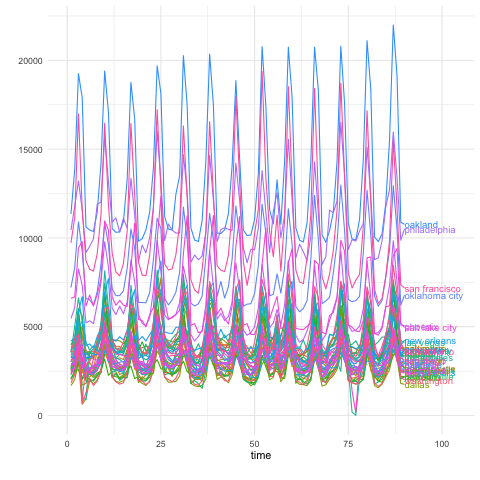

In [34]:
f = '''
GeoPlot(GeoTestData_PreTest,
                   Y_id = "Y",
                   time_id = "time",
                   location_id = "location")
'''

make_geolift_plot(f)

In [27]:
# Step 2: Pre-Analysis
    
with localconverter(robjects.default_converter):
    
    # Import R's base package
    base = importr('base')

    # Define the R function to create and capture the plot
    r('''
    create_plot <- function() {

      # Create the plot
      p <- GeoPlot(GeoTestData_PreTest,
                   Y_id = "Y",
                   time_id = "time",
                   location_id = "location")

      # Open a png device in memory with specified width, height, and resolution
      grDevices::png(tempfile(), bg = "transparent")
      print(p)
      grDevices::dev.off()

      # Read the file and return its content
      temp_file <- tempfile()
      grDevices::png(temp_file, bg = "transparent")
      print(p)
      grDevices::dev.off()

      raw_vector <- base::readBin(temp_file, what = "raw", n = file.info(temp_file)$size)
      unlink(temp_file) # Remove the temp file
      return(raw_vector)
    }
    ''')

    # Call the R function
    raw_vector = robjects.r['create_plot']()

In [11]:
from io import BytesIO
from PIL import Image

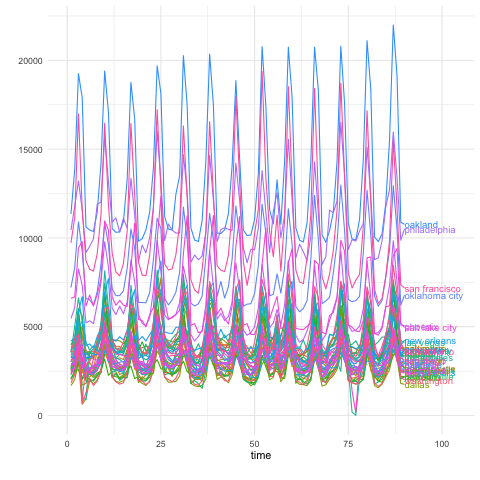

In [28]:
# Convert the R raw vector to Python bytes
img_data = bytes(raw_vector)

# Use BytesIO to handle the image data
img_buffer = BytesIO(img_data)

# Open the image using PIL
img = Image.open(img_buffer)

# Display the image
display(img)  
# img.show()  # img.show() outputs a .png popup that can be saved

In [ ]:
# Step 2: Pre-Analysis
# Replace this with the appropriate pre-analysis code from the walkthrough
r('''
# Your pre-analysis code here
''')

# Step 3: Model Diagnostics
# Replace with model diagnostic code from the walkthrough
r('''
# Your model diagnostics code here
''')

# Step 4: Post-Analysis
# Replace with post-analysis code from the walkthrough
r('''
# Your post-analysis code here
''')

# Step 5: View Results
# Replace with the code to view results from the walkthrough
r('''
# Your code to view results here
''')


In [ ]:
# Step 2: Pre-Analysis
# Replace this with the appropriate pre-analysis code from the walkthrough
r('''
# Your pre-analysis code here
''')

# Step 3: Model Diagnostics
# Replace with model diagnostic code from the walkthrough
r('''
# Your model diagnostics code here
''')

# Step 4: Post-Analysis
# Replace with post-analysis code from the walkthrough
r('''
# Your post-analysis code here
''')

# Step 5: View Results
# Replace with the code to view results from the walkthrough
r('''
# Your code to view results here
''')


In [ ]:
# Step 2: Pre-Analysis
# Replace this with the appropriate pre-analysis code from the walkthrough
r('''
# Your pre-analysis code here
''')

# Step 3: Model Diagnostics
# Replace with model diagnostic code from the walkthrough
r('''
# Your model diagnostics code here
''')

# Step 4: Post-Analysis
# Replace with post-analysis code from the walkthrough
r('''
# Your post-analysis code here
''')

# Step 5: View Results
# Replace with the code to view results from the walkthrough
r('''
# Your code to view results here
''')


In [ ]:
# Step 2: Pre-Analysis
# Replace this with the appropriate pre-analysis code from the walkthrough
r('''
# Your pre-analysis code here
''')

# Step 3: Model Diagnostics
# Replace with model diagnostic code from the walkthrough
r('''
# Your model diagnostics code here
''')

# Step 4: Post-Analysis
# Replace with post-analysis code from the walkthrough
r('''
# Your post-analysis code here
''')

# Step 5: View Results
# Replace with the code to view results from the walkthrough
r('''
# Your code to view results here
''')
